In [17]:
# modulos para analizar los datos
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
#armar colormap para agua y tierra
c_agua=plt.cm.Blues_r(np.linspace(0,0.75,256))
c_terr=plt.cm.Greens_r(np.linspace(0,0.75,256))
cols = np.vstack((c_agua, c_terr))
cmap=cm.colors.LinearSegmentedColormap.from_list("q", cols)

In [19]:
#archivo nc (grd) a cargar
nc_file=r"Z:\Google Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\bat_IV_region\bat_l3_iv_region_centro01_1sa.grd"

# ver contenidos archivo nc (grd)
data_nc=xr.open_dataset(nc_file)

with data_nc as ds:
  print(ds.keys()) # muestra contenido del archivo .grd

print()
print('Resolucion [arcseg]')
print(abs(np.diff(data_nc.x.values))*3600)
print(abs(np.diff(data_nc.y.values))*3600)
print()
print('Limites en x e y')
print('x:\t',data_nc.x.min().values,'\t',data_nc.x.max().values)
print('y:\t',data_nc.y.min().values,'\t',data_nc.y.max().values)

KeysView(<xarray.Dataset>
Dimensions:  (x: 2881, y: 4380)
Coordinates:
  * x        (x) float64 288.1 288.1 288.1 288.1 ... 288.9 288.9 288.9 288.9
  * y        (y) float64 -29.66 -29.66 -29.66 -29.66 ... -30.88 -30.88 -30.88
Data variables:
    z        (y, x) float64 ...)

Resolucion [arcseg]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]

Limites en x e y
x:	 288.1 	 288.9
y:	 -30.87680644565159 	 -29.6604175567627


In [27]:
x_mareografo, y_mareografo=288.665, -29.94969254

z_boya=data_nc.z.sel(x=x_mareografo,y=y_mareografo,method="nearest").values.item()
z_boya

-0.03432826689591647

-0.03432826689591647


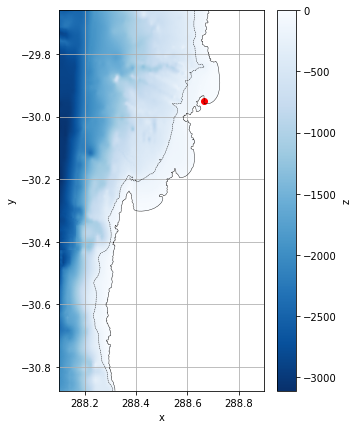

In [31]:
#Plotear batimetria
variable=data_nc.z.where(data_nc.z<=0)

#divnorm = cm.colors.DivergingNorm(vmin=data_nc.deformed_bathy.min(), vcenter=0, vmax=data_nc.deformed_bathy.max())

variable.plot.imshow(aspect=ds.dims['x'] / ds.dims['y'],size=7,cmap='Blues_r')
                          #,cmap=cmap,norm=divnorm)   #variable de interes
data_nc.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.4) #curva de nivel 0 y 200m
plt.scatter(x_mareografo,y_mareografo,color="r")

plt.grid()

#plt.savefig(nombre_archivo+'_'+nombre_variable+'.png',dpi=300) !!!!Falta arreglar nonmbre de archivo

print(z_boya)

## Pruebas

In [22]:
inf_izq=[282.21985,-45.36212]
sup_der=[290.77505,-14.99956]

muestra=data_nc.where(((data_nc.x > inf_izq[0]) & (data_nc.x < sup_der[0])&
                       (data_nc.y > inf_izq[1]) & (data_nc.y < sup_der[1])),drop=True)

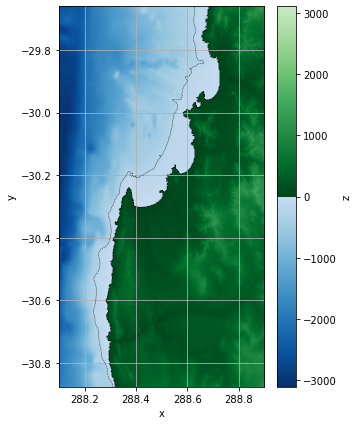

In [23]:
muestra.z.plot.imshow(aspect=muestra.dims['x'] / muestra.dims['y'],size=7,cmap=cmap)
muestra.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.4) #curva de nivel 0 y 200m
plt.grid()

In [24]:
#verificar

punto=[287,-33]
d=0.06

muestra=data_nc.where(((data_nc.x > punto[0]-d) & (data_nc.x < punto[0]+d)
                       &(data_nc.y > punto[1]-d)&(data_nc.y < punto[1]+d)),drop=True)

muestra.plot.scatter(x='x',y='y',aspect=muestra.dims['x'] / muestra.dims['y'],size=7)
plt.grid()

ZeroDivisionError: division by zero

### plotear dominios

In [72]:
# grilla de base(la mas grande)
grd_base=r"Z:\Google Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\bat_IV_region\bat_l2_iv_region_3sa.grd"

#grillas anidadas
grd_1=r"Z:\Google Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\bat_IV_region\bat_l3_iv_region_centro01_1sa.grd"
grd_2=r"Z:\Google Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\bat_IV_region\bat_l3_iv_region_sur_1sa.grd"

data_base=xr.open_dataset(grd_base)
data_1=xr.open_dataset(grd_1)
data_2=xr.open_dataset(grd_2)

In [ ]:
# mareografos


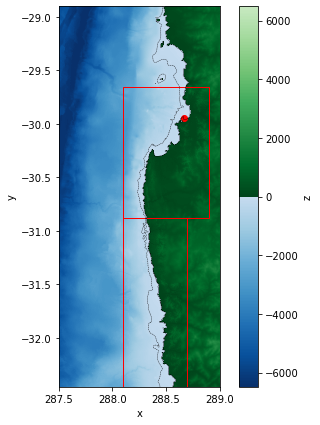

In [82]:
fig,ax1=plt.subplots(figsize=(7,7))

data_base.z.plot.imshow(cmap=cmap,ax=ax1)
data_base.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.4,ax=ax1)

data=data_1
inf_izq=[data.x.values[0],data.y.values[-1]]
ancho=data.x.values[-1]-data.x.values[0]
alto=data.y.values[0]-data.y.values[-1]
rect=patches.Rectangle((inf_izq[0],inf_izq[1]),ancho,alto,linewidth=1,edgecolor='r',facecolor='none')
ax1.add_patch(rect)

data=data_2
inf_izq=[data.x.values[0],data.y.values[-1]]
ancho=data.x.values[-1]-data.x.values[0]
alto=data.y.values[0]-data.y.values[-1]
rect=patches.Rectangle((inf_izq[0],inf_izq[1]),ancho,alto,linewidth=1,edgecolor='r',facecolor='none')
ax1.add_patch(rect)

plt.scatter(x_mareografo,y_mareografo,color="r")


ax1.set_aspect('equal')